# Importing Libraries

In [22]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# 1.Importing Dataframe

In [23]:
# Setting Variables
path = r'C:\Users\Saikat Halder\Documents\CareerFoundry\Data Immersion\Achievement 6\World Happiness Report Analysis 03202024'

# Importing Merged and Cleaned Dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','WHS_merged_clean_2.pkl'))

## Verifying Dataframes

In [24]:
df_merged.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [25]:
df_merged.shape

(1367, 10)

In [26]:
%matplotlib inline

In [27]:
df_merged.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584078,0.450771,0.196260,0.132378,2018.903438
std,1.117909,0.453703,0.331163,0.245031,0.156733,0.113301,0.112579,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402554,0.356000,0.115000,0.056884,2017.000000
50%,5.440000,1.043000,1.083000,0.613212,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777602,0.568685,0.252858,0.166500,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


## Creating a new Dataframe with numerical data types

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1367 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1367 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [9]:
df_num= df_merged.select_dtypes(include=['float64'])

# Display the new DataFrame
df_num

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...
1362,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800
1363,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700
1364,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100
1365,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700


# 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

[-2288.5321879349353,
 -907.2945014748916,
 -613.6215411740723,
 -471.54209105398434,
 -400.85911698637835,
 -368.1977060945907,
 -342.2129457000692,
 -318.553653636757,
 -302.5811987680538]

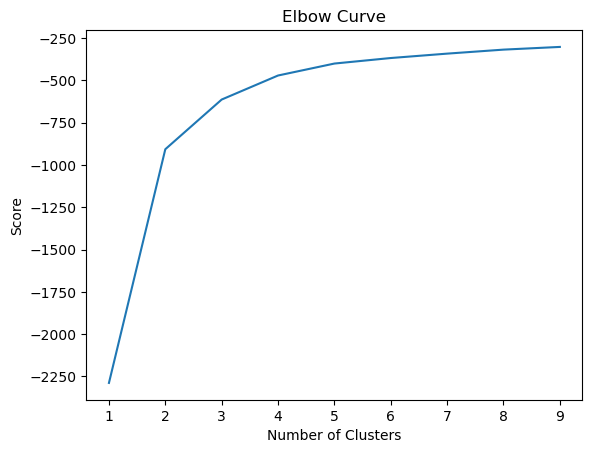

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

# 3. K- Means Clustering 

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
# Add a new cluster column in the df_num
df_num['clusters'] = kmeans.fit_predict(df_num)
df_num

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,0
...,...,...,...,...,...,...,...,...
1362,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,1
1363,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,1
1364,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,1
1365,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,1


In [16]:
# Getting the value counts for clusters
df_num['clusters'].value_counts()

clusters
2    537
1    442
0    388
Name: count, dtype: int64

## GDP

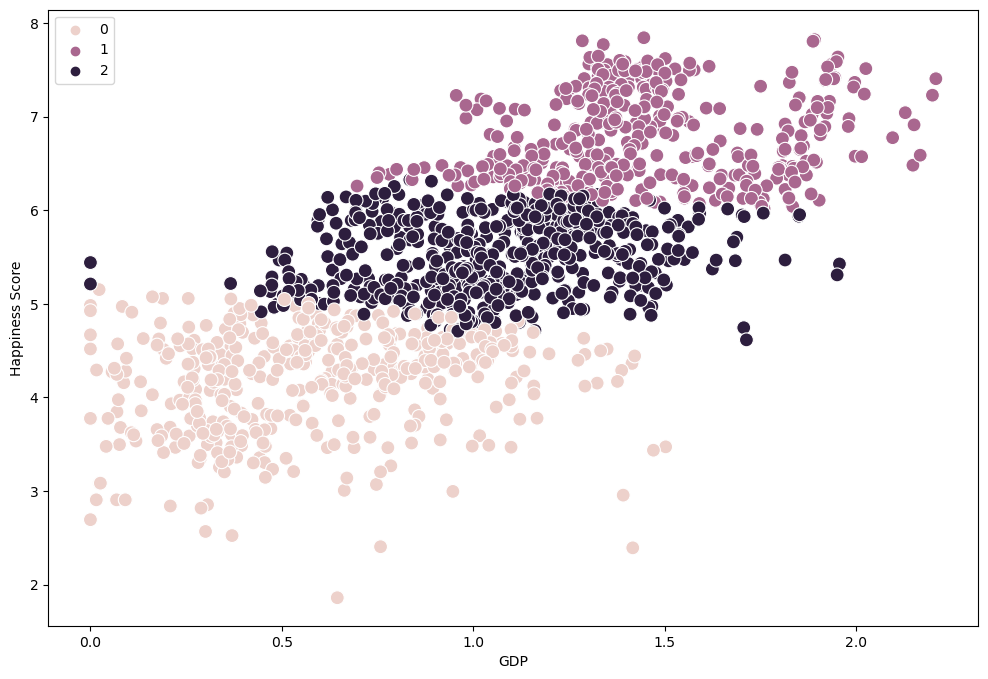

In [40]:
# Plot the clusters for the "happiness_score" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['gdp_per_capita'], y=df_num['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

#### Here it can be clearly seen that countries with higher GDP have higher Happiness Score.
#### Countries with lower GDP tends to have lower Happiness Score
#### Countries with medium Happiness Score (5- 6.5)  tends to have medium GDP where most of the data points are clustered between (0.5 to 1.5)

## Healthy Life Expectency

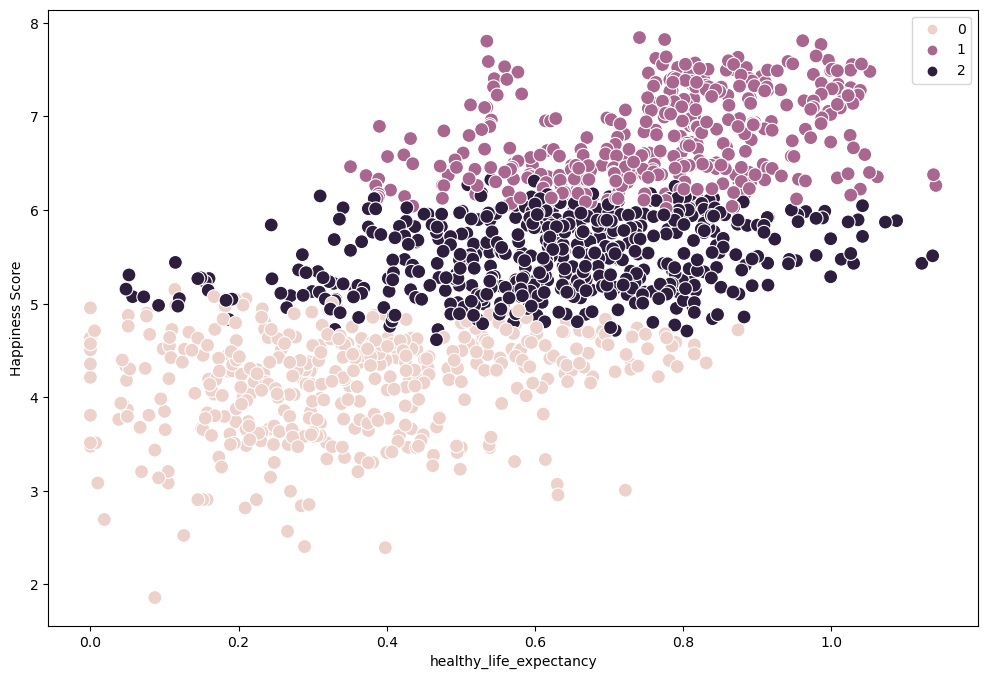

In [41]:
# Plot the clusters for the "happiness_score" and "healthy_life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['healthy_life_expectancy'], y=df_num['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('healthy_life_expectancy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

#### Countries with lower Life Expectancy tends to have lower Happiness Score
#### Countries with medium and high Life Expectancy  tends to have higher Happiness Score

## Perception of Corruption 

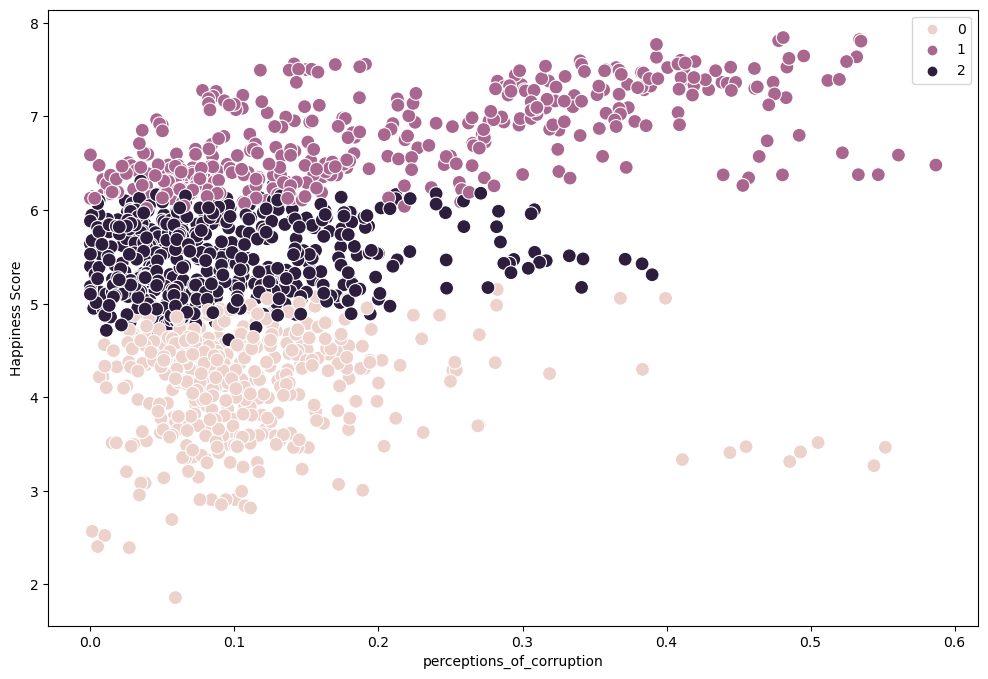

In [42]:
# Plot the clusters for the "happiness_score" and "perceptions_of_corruption" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['perceptions_of_corruption'], y=df_num['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('perceptions_of_corruption') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

#### While most of the Perception of Corruption datapoints are clustered between 0 and 3 for Low, Medium and High Happiness Score, a significant number of countries with high Happiness Score have high Perception of Corruption.  In theory, the higher the perception of corruption, the lower the Happiness Score should be. Further analysis is needed for this.

## Generosity

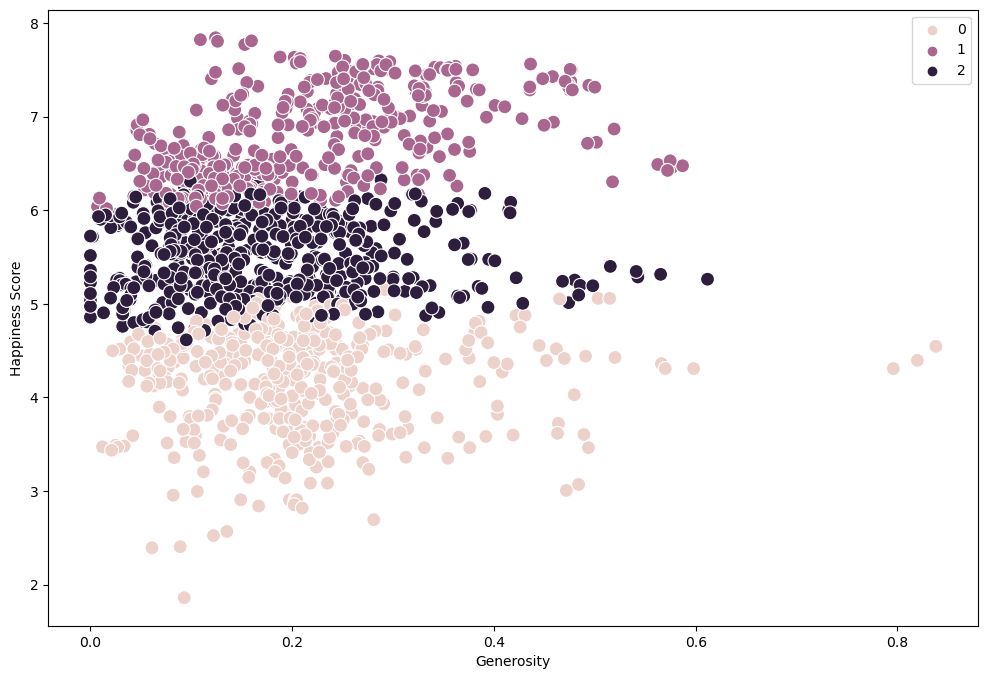

In [46]:
# Plot the clusters for the "happiness_score" and "generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['generosity'], y=df_num['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

#### While there are some outliers, in general, Happiness Score does not depend on generosity.

In [43]:
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [47]:
df_num.groupby('cluster').agg({'gdp_per_capita':['mean', 'median'], 
                         'healthy_life_expectancy':['mean', 'median'], 
                         'perceptions_of_corruption':['mean', 'median'],
                          'generosity':['mean', 'median'],     
                          'happiness_score':['mean', 'median']})

gdp_per_capita           healthy_life_expectancy            \
                      mean    median                    mean    median   
cluster                                                                  
dark purple       1.061142  1.055849                0.631489  0.638287   
pink              0.587221  0.560740                0.360811  0.342866   
purple            1.450588  1.403000                0.771047  0.793984   

            perceptions_of_corruption           generosity            \
                                 mean    median       mean    median   
cluster                                                                
dark purple                  0.092130  0.074000   0.170551  0.150111   
pink                         0.108593  0.089141   0.207934  0.197135   
purple                       0.214945  0.177000   0.218613  0.199358   

            happiness_score          
                       mean  median  
cluster                              
dark purple        5.511356  5.5127  
pink               4.170087  4.2945  
purple             6.781535  6.6900

#### The purple cluster has the best numbers in all the categories. This should be all good except, mean perception of corruption is also higher for purple cluster and in theory, it should not be. It seems the other factors play a more vital role in determining Happiness compared to perception of corruption. Generosity is almost same for all the clusters except for dark purple, for which it is a bit lower. Other than that, generosity does not play a vital role in determining a country's Happiness Score.

# Merging with the Original Dataframe

In [28]:
# Merge df_merged with df_num on their index
df_merged_new = pd.merge(df_merged, df_num[['clusters']], left_index=True, right_index=True)

In [29]:
# Confirming new df
df_merged_new.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,clusters
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,0
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,0
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,0
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,0
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,0


In [30]:
# Define cluster colors based on cluster values
cluster_colors = {
    0: 'pink',
    1: 'purple',
    2: 'dark purple'
}

# Create a new column 'cluster_color' based on the 'clusters' column values
df_merged_new['cluster_color'] = df_merged_new['clusters'].map(cluster_colors)

# Display the updated DataFrame
df_merged_new.head()


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,clusters,cluster_color
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,0,pink
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,0,pink
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,0,pink
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,0,pink
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,0,pink


## Creating Rank based on Happiness Score partition by Year

In [32]:
# Create a new Dataframe
df_merged_new_rank = df_merged_new.copy()

# Create a new column 'rank' partitioned by 'year' based on 'happiness_score'
df_merged_new_rank['rank'] = df_merged_new_rank.groupby('year')['happiness_score'].rank(ascending=False)

# Display the new DataFrame
df_merged_new_rank.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,clusters,cluster_color,rank
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,0,pink,1.0
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,0,pink,2.0
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,0,pink,3.0
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,0,pink,4.0
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,0,pink,5.0


In [34]:
df_merged_new_rank.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
clusters                          int32
cluster_color                    object
rank                            float64
dtype: object

In [35]:
# Converting rank into int64
df_merged_new_rank['rank'] = df_merged_new_rank['rank'].astype('int64')

In [36]:
df_merged_new_rank.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
clusters                          int32
cluster_color                    object
rank                              int64
dtype: object

# Exporting the new Dataframe as csv

In [39]:
# Exporting New Dataframe as csv for tableau
df_merged_new_rank.to_csv(os.path.join(path, '02 Data', 'Prepared Data','WHS_Merged_Clustered_Ranked.csv'))